## ML: Customer Analysis | Linear regression LAB

In [1]:
#Libraries
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [2]:
import numpy as np
from scipy.stats import norm
import math
import pandas as pd

In [3]:
marketing = pd.read_csv("Data/marketing_customer_analysis.csv")

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [4]:
#Data types of the columns
marketing.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [9]:
numerical = marketing.select_dtypes(np.number)

In [10]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
categorical = marketing.select_dtypes(np.object_)

In [8]:
categorical

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


2. For the numerical variables:
  - Use Matplotlib to construct histograms to check the normality of the numerical variables visually
  - Check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

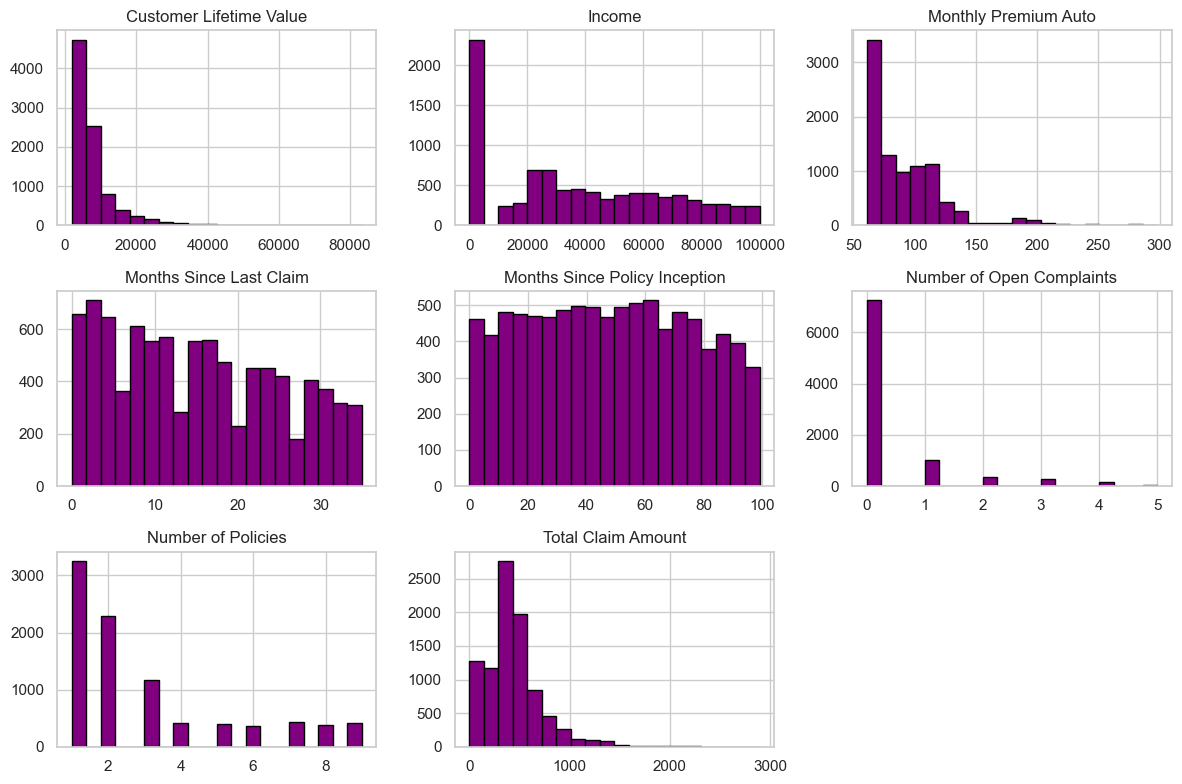

In [11]:
#matplotlib (codigo del lab 5-2)
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical.columns):
    plt.subplot(3, 3, i+1)  
    plt.hist(numerical[column], bins=20, color='purple', edgecolor='black')  
    plt.title(column) 
    plt.xlabel('')  

plt.tight_layout()
plt.show()

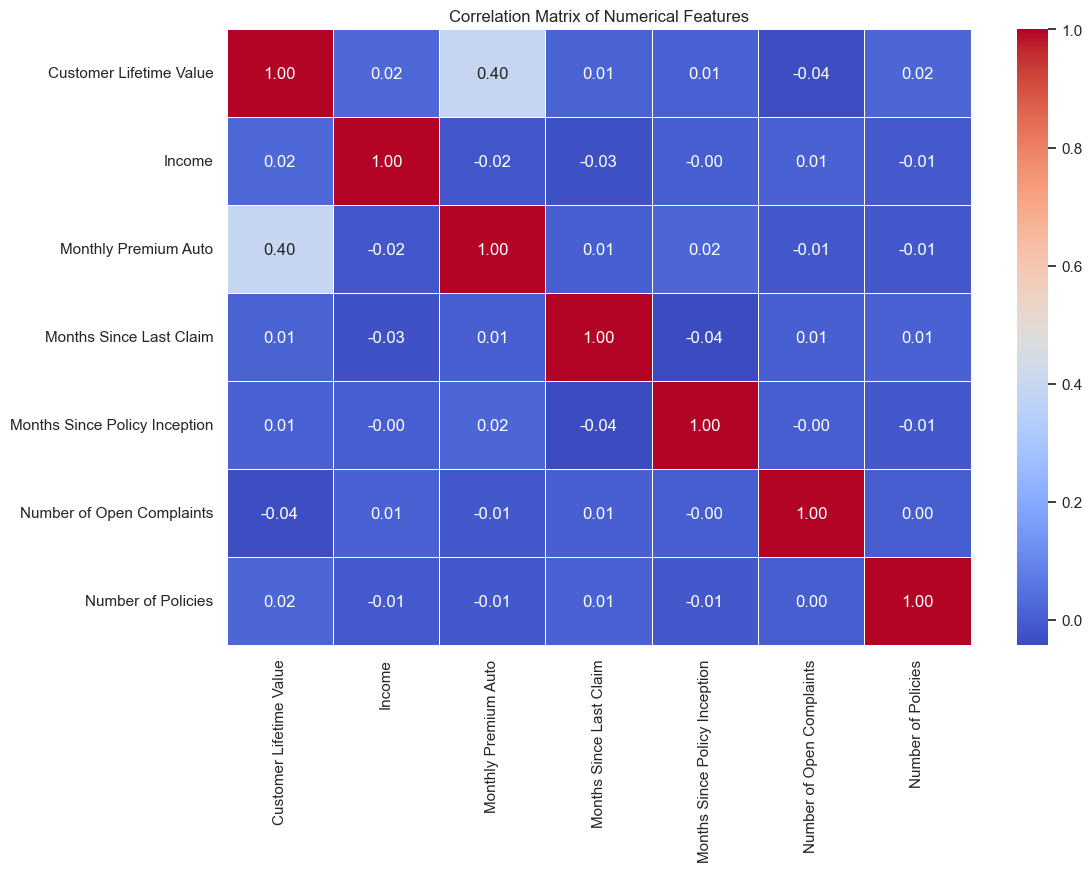

In [12]:
numerical2 = numerical.drop(columns=['Total Claim Amount'])
correlation_matrix = numerical2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

3. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [ ]:
#No hay ningur par de variables de la cuales la correlación sea superior a 0.9. En este caso no droppeo ninguna.

4. Split data into Y (total_claim_amount) and X (numerical, independent variables)

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
Y = numerical['Total Claim Amount'] #definiendo variable dependiente
X = numerical.drop(['Total Claim Amount'], axis=1)#defino mi df de variables independientes
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:52:13   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

En este caso:
- Cuanto mas cerca de de 0 esta la p.valor es que la variable es más significativa como por ejemplo
  - Income o Monthly Premium Auto
- El R-squared de 0.519 Si bien no es perfecto (ya que no explica el 100% de la varianza), sigue siendo lo suficientemente significativo como para sugerir que el modelo tiene cierto poder predictivo. Podemos decir que las variables independientes explican mas o menos un 51,9% de la variación total observada en Total Claim Amount (variable dependiente)
- Coef (Coeficientes para variables independientes): representan el cambio estimado en la variable dependiente para un cambio de una unidad en la variable independiente correspondiente, manteniendo todas las demás constantes, entonces ,un coef negativo para la variable Ingreso (-0,0033) sugiere que a medida que el ingreso aumenta, el Total Claim amount tiende a disminuir. Esto podría significar que las personas con niveles de ingresos más altos presentan menos o reclamos de seguro más pequeños.

In [16]:
#Sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
print("R2 value is = ",round(lm.score(X,Y),2))

R2 value is =  0.52


In [17]:
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
predictions = lm.predict(X)
mse = mean_squared_error(Y, predictions)
print("The mse of the model is = ",mse)

R2 value is =  0.52
The intercept of the model is =  72.3909681918422
The coefficients of the model are =  [ 0.00000000e+00 -6.74723453e-04 -3.29341526e-03  5.34254540e+00
 -1.45721018e-01 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]
The mse of the model is =  40615.74326224916


En este caso, usando Sklearn el resultado es distinto al de statsmodel (es eso normal?)
El valor que sale es de 0.52 entonces puede que el modelo tenga cierta capacidad predictiva, pero también puede haber otras variables no incluidas que podrían explicar parte de la variabilidad no capturada... seguramente el modelo es infinitmene mejorable y aún tengo que aprender a interpretar segun cada caso de lo que se esté analizando.